In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
import tensorflow as tf

In [2]:
df = pd.read_csv('IEMOCAP/iemocapTrans.csv')
df

,_id,activation,dominance,emotion,end_time,start_time,titre,to_translate,translated,valence
0,625682441da7a5c1eaef3689,2.5,3.5,sad,6.0541,3.9987,Ses02M_impro02_F000,I don't want you to go.,Je ne veux pas que tu partes.,2.5
1,625682441da7a5c1eaef368a,3.0,4.0,sad,15.1000,7.0366,Ses02M_impro02_M000,"I know, I know. I don't want to go either bab...",Je sais je sais. Je ne veux pas y aller non pl...,2.0
2,625682441da7a5c1eaef368b,2.5,4.5,sad,23.3599,15.5524,Ses02M_impro02_F001,I'm going to miss you too; I don't know what ...,Tu vas me manquer aussi; Je ne sais pas ce que...,1.5
3,625682441da7a5c1eaef368c,2.5,4.0,sad,26.4151,23.5790,Ses02M_impro02_F002,I don't want to be a single mom.,Je ne veux pas être une mère célibataire.,1.5
4,625682441da7a5c1eaef368d,3.0,3.5,sad,31.4253,26.7598,Ses02M_impro02_M001,You won't be. I'll be back; I'll be back befo...,Vous ne le serez pas. Je reviendrai; Je serai ...,3.5
...,...,...,...,...,...,...,...,...,...,...
10034,6256a3f81da7a5c1eaef862b,3.0,3.0,ang,480.1500,473.5225,Ses01M_script01_3_F028,Everything Chris do you understand that? To ...,Tout Chris est-ce que tu comprends ça ? A moi ...,2.5
10035,6256a3f81da7a5c1eaef862c,3.0,3.0,fru,495.6700,481.6500,Ses01M_script01_3_F029,And your money there's nothing wrong in your ...,Et votre argent il n'y a rien de mal dans votr...,2.5
10036,6256a3f81da7a5c1eaef862d,2.0,2.0,hap,502.2700,499.4600,Ses01M_script01_3_M042,Annie...,Anni...,3.5
10037,6256a3f81da7a5c1eaef862e,2.5,2.5,hap,511.4612,507.7700,Ses01M_script01_3_M043,I'm going to make a fortune for you.,Je vais te faire fortune.,4.0


In [3]:
df['filename'] = df.apply(lambda row: f"IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wav/{row['titre']}.wav", axis=1)
# df = df[['filename', 'emotion']]
df = df[['filename', 'emotion', 'activation', 'dominance', 'valence']]
df

,filename,emotion,activation,dominance,valence
0,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,3.5,2.5
1,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,3.0,4.0,2.0
2,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,4.5,1.5
3,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,4.0,1.5
4,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,3.0,3.5,3.5
...,...,...,...,...,...
10034,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,ang,3.0,3.0,2.5
10035,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,fru,3.0,3.0,2.5
10036,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,hap,2.0,2.0,3.5
10037,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,hap,2.5,2.5,4.0


In [4]:
df['activation'] = df['activation'].astype('float32')
df['dominance'] = df['dominance'].astype('float32')
df['valence'] = df['valence'].astype('float32')

/var/folders/v7/b7tybj991834179yjj0j4s6r0000gn/T/ipykernel_21036/3460282227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activation'] = df['activation'].astype('float32')
/var/folders/v7/b7tybj991834179yjj0j4s6r0000gn/T/ipykernel_21036/3460282227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dominance'] = df['dominance'].astype('float32')
/var/folders/v7/b7tybj991834179yjj0j4s6r0000gn/T/ipykernel_21036/3460282227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [5]:
no_labels = df['emotion'].nunique()
no_labels

10

In [6]:
# processed_df = df
# no_features = 3

In [7]:
pip install opensmile

Note: you may need to restart the kernel to use updated packages.


In [8]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016, # 6373 features
    # feature_set=opensmile.FeatureSet.eGeMAPSv02, # 88 features
    feature_level=opensmile.FeatureLevel.Functionals,
)
y = smile.process_file('IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wav/Ses01M_script01_3_F030.wav')
no_features = y.shape[1] + 3
no_features

6376

In [9]:
features_df = pd.DataFrame()
features_df
directory = 'IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wav/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    features = smile.process_file(f)
    features.loc[f, 'filename'] = f
    features_df = pd.concat([features_df, features])

features_df.reset_index(drop=True, inplace=True)
features_df

Exception ignored on calling ctypes callback function: <function OpenSMILE.external_sink_set_callback_ex.<locals>.internal_callback_ex at 0x310edd800>
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/opensmile/core/lib.py", line 423, in internal_callback_ex
    def internal_callback_ex(data, nt, n, meta: POINTER(FrameMetaData), _):

KeyboardInterrupt: 
/opt/homebrew/lib/python3.11/site-packages/opensmile/core/smile.py:301: UserWarning: Segment too short, filling with NaN.
  warnings.warn(
/var/folders/v7/b7tybj991834179yjj0j4s6r0000gn/T/ipykernel_21036/107236623.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, features])


In [ ]:
processed_df = pd.merge(df, features_df, on='filename', how='inner')
processed_df

,filename,emotion,activation,dominance,valence,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,3.5,2.5,0.299509,0.671717,0.904040,0.083267,0.106899,...,5.039083,0.563801,1.916624,1.906872,19.876108,0.558942,89.716103,37.726109,86.258842,52.002323
1,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,3.0,4.0,2.0,0.397305,0.170213,0.431790,0.087322,0.110432,...,5.655840,0.467406,1.811595,1.803445,19.913736,0.537280,92.461571,39.272797,92.189415,43.874863
2,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,4.5,1.5,0.569596,0.879690,0.968952,0.091554,0.167338,...,9.827312,0.627209,2.138054,2.137567,20.000000,0.454115,99.026192,52.141178,100.566071,51.331375
3,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,2.5,4.0,1.5,0.440576,0.449275,0.123188,0.061053,0.159630,...,4.783856,0.533823,1.912794,1.951924,-17.868319,0.472216,86.413589,44.526230,91.105904,42.958740
4,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,sad,3.0,3.5,3.5,0.496499,0.470588,0.766885,0.100332,0.161400,...,6.656488,0.652528,1.889067,1.891607,-19.999416,0.438965,99.632385,41.548191,89.402184,45.756069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,ang,3.0,3.0,2.5,1.612514,0.128244,0.990840,0.133742,0.150032,...,4.705351,0.442853,1.828890,1.823098,19.972982,0.614220,89.338638,46.357021,91.644981,40.855824
10035,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,fru,3.0,3.0,2.5,1.569933,0.817073,0.344333,0.132842,0.201743,...,7.646286,0.489694,2.292493,2.292597,-20.000000,0.561125,103.335129,58.041004,103.845383,62.175247
10036,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,hap,2.0,2.0,3.5,0.139114,0.419708,0.872263,0.106907,0.109206,...,5.345236,0.666947,1.543397,1.539112,19.983440,0.554225,92.557396,41.354195,90.191925,37.509872
10037,IEMOCAP/Iemocap_audio/iemocap_audio/IEMOCAP_wa...,hap,2.5,2.5,4.0,0.443043,0.450276,0.132597,0.106880,0.128752,...,5.763847,0.529927,1.653996,1.630195,18.753551,0.470189,94.897827,57.317921,91.904251,43.660625


Deep Learning

In [ ]:

import torch
from torch import nn
import os
os.environ["TORCH_METAL_ENABLED"] = "1"

class MLP(nn.Module):

    def __init__(self, no_features, no_hidden, no_labels):
        super().__init__()
        layers = []
        parameters = [no_features] + no_hidden
        for i in range(len(parameters) - 1):
            layers.append(nn.Linear(parameters[i], parameters[i+1], dtype=torch.float32))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))
        
        self.mlp_stack = nn.Sequential(*layers)
        self.fc = nn.Linear(parameters[-1], no_labels)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x1 = self.mlp_stack(x)
        u = self.fc(x1)
        y = self.softmax(u)
        return y
    
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [ ]:
import tqdm
import time
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from scipy.io import wavfile as wav

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix



def split_dataset(df, columns_to_drop, test_size, random_state):
    label_encoder = preprocessing.LabelEncoder()

    df['emotion'] = label_encoder.fit_transform(df['emotion'])

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    df_train2 = df_train.drop(columns_to_drop,axis=1)
    y_train2 = df_train['emotion'].to_numpy()

    df_test2 = df_test.drop(columns_to_drop,axis=1)
    y_test2 = df_test['emotion'].to_numpy() 

    return df_train2, y_train2, df_test2, y_test2

def preprocess_dataset(df_train, df_test):

    standard_scaler = preprocessing.StandardScaler()
    df_train_scaled = standard_scaler.fit_transform(df_train)

    df_test_scaled = standard_scaler.transform(df_test)

    return df_train_scaled, df_test_scaled

In [ ]:
def preprocess(df):
    columns_to_drop = ['filename', 'emotion']
    test_size = 0.25
    random_state = 1
    X_train, y_train, X_test, y_test = split_dataset(df, columns_to_drop, test_size, random_state)
    X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)
    
    return X_train_scaled, y_train, X_test_scaled, y_test

X_train_scaled, y_train, X_test_scaled, y_test = preprocess(processed_df)

/var/folders/v7/b7tybj991834179yjj0j4s6r0000gn/T/ipykernel_20232/252389953.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion'] = label_encoder.fit_transform(df['emotion'])


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

def intialise_loaders(X_train_scaled, y_train, X_test_scaled, y_test, batch_size):
    train_data = CustomDataset(X_train_scaled, y_train)
    test_data = CustomDataset(X_test_scaled, y_test)
    train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size, shuffle=True)
    return train_dataloader, test_dataloader

optimal_bs = 256
train_dataloader, test_dataloader = intialise_loaders(X_train_scaled, y_train, X_test_scaled, y_test, optimal_bs)

In [ ]:
no_hidden = [256, 64]
model = MLP(no_features, no_hidden, no_labels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# # use pre-trained model
# no_hidden = [64]
# model = MLP(no_features, no_hidden, 7)
# weights_file = 'model_weights.pth'
# model.load_state_dict(torch.load(weights_file))

# # Define the new output layer
# new_output_layer = nn.Linear(64, 10)

# # Modify the model's last layer
# model.fc = new_output_layer

# # Optionally freeze the weights of previous layers (if needed)
# for name, param in model.named_parameters():
#     if name == 'fc.weight' or name == 'fc.bias':  # Unfreeze the parameters of the new output layer
#         param.requires_grad = True
#     else:
#         param.requires_grad = False


# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# loss_fn = nn.CrossEntropyLoss()

In [ ]:
# early stopping obtained from tutorial
class EarlyStopper:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [ ]:
num_epochs = 1000
batch_size = 64
early_stopper = EarlyStopper(patience=5, min_delta=0.05)

training_losses = []
training_accuracy = []
validation_losses = []
validation_accuracy = []

for epoch in range(num_epochs):
    model.train()    
    training_loss = 0
    training_correct_preds = 0
    total = 0
    
    # training
    for inputs, labels in train_dataloader:
        # forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # track loss and accuracy
        training_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        training_correct_preds += (predicted == labels).sum().item()
        
    training_losses.append(training_loss / len(train_dataloader))
    training_accuracy.append(training_correct_preds / len(train_dataloader.dataset))
        
    # validation
    model.eval() 
    with torch.no_grad():
        validation_loss = 0
        validation_correct_preds = 0
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            validation_correct_preds += (predicted == labels).sum().item()
    
    validation_losses.append(validation_loss / len(test_dataloader))
    validation_accuracy.append(validation_correct_preds / len(test_dataloader.dataset))
    
    # early stopping
    if early_stopper.early_stop(validation_loss):
        print(f"Stopped early at epoch {epoch}.")
        print(f"Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}, Training Accuracy: {training_accuracy[-1]}, Validation Accuracy: {validation_accuracy[-1]}")
        break

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}, Training Accuracy: {training_accuracy[-1]}, Validation Accuracy: {validation_accuracy[-1]}")


Epoch [1/1000], Training Loss: 2.194837220509847, Validation Loss: 2.0557787895202635, Training Accuracy: 0.32753353699030413, Validation Accuracy: 0.4689243027888446
Epoch [2/1000], Training Loss: 2.0178026517232257, Validation Loss: 1.9831111907958985, Training Accuracy: 0.46925222473104, Validation Accuracy: 0.5043824701195219
Epoch [3/1000], Training Loss: 1.9862677176793417, Validation Loss: 1.96244934797287, Training Accuracy: 0.48426085801567276, Validation Accuracy: 0.5127490039840638
Epoch [4/1000], Training Loss: 1.9735108137130737, Validation Loss: 1.9552512764930725, Training Accuracy: 0.4901049276132288, Validation Accuracy: 0.5143426294820718
Epoch [5/1000], Training Loss: 1.9675451199213663, Validation Loss: 1.9514458537101746, Training Accuracy: 0.4968787355558507, Validation Accuracy: 0.5115537848605578
Epoch [6/1000], Training Loss: 1.965042265256246, Validation Loss: 1.9464854955673219, Training Accuracy: 0.49528489839288087, Validation Accuracy: 0.5179282868525896
E

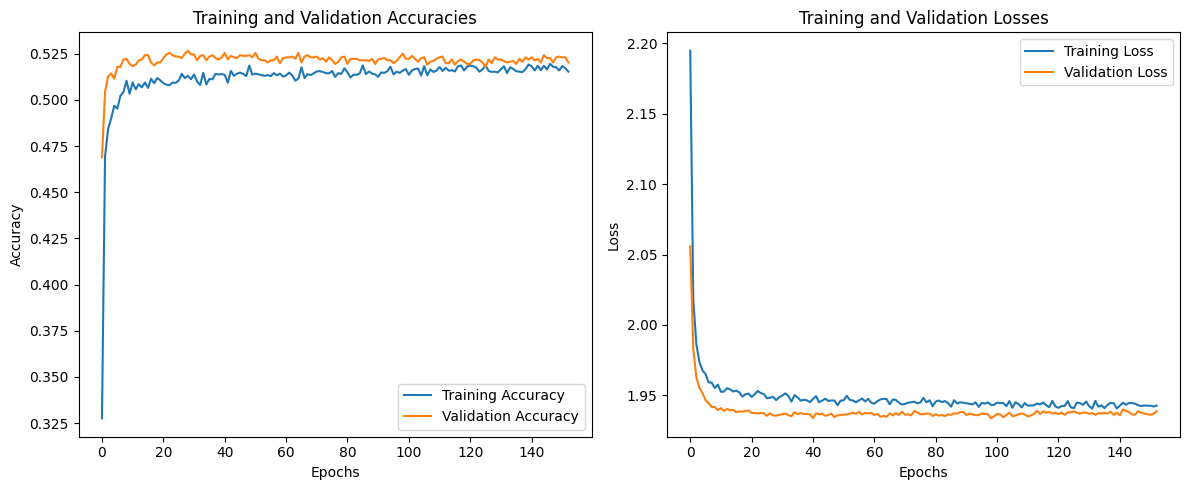

In [ ]:
import matplotlib.pyplot as plt

# plot accuracies
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(training_accuracy)), training_accuracy, label='Training Accuracy')
plt.plot(range(len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot losses
plt.subplot(1, 2, 2)
plt.plot(range(len(training_losses)), training_losses, label='Training Loss')
plt.plot(range(len(validation_losses)), validation_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

def generate_cv_folds_for_parameters(parameters, X_train, y_train):
    """
    returns:
    X_train_scaled_dict(dict) where X_train_scaled_dict[parameter] is a list of the preprocessed training matrix for the different folds.
    X_val_scaled_dict(dict) where X_val_scaled_dict[parameter] is a list of the processed validation matrix for the different folds.
    y_train_dict(dict) where y_train_dict[parameter] is a list of labels for the different folds
    y_val_dict(dict) where y_val_dict[parameter] is a list of labels for the different folds
    """
    standard_scaler = preprocessing.StandardScaler()
    X_train_scaled_dict = {}
    X_val_scaled_dict = {}
    y_train_dict = {}
    y_val_dict = {}

    for parameter in parameters:
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        X_train_scaled_folds = []
        X_val_scaled_folds = []
        y_train_folds = []
        y_val_folds = []

        for train_index, val_index in kfold.split(X_train, y_train):
            X_train_fold = X_train[train_index]
            X_val_fold = X_train[val_index]
            y_train_fold = y_train[train_index]
            y_val_fold = y_train[val_index]

            X_train_scaled_fold = standard_scaler.fit_transform(X_train_fold)
            X_val_scaled_fold = standard_scaler.transform(X_val_fold)

            X_train_scaled_folds.append(X_train_scaled_fold)
            X_val_scaled_folds.append(X_val_scaled_fold)
            y_train_folds.append(y_train_fold)
            y_val_folds.append(y_val_fold)

        X_train_scaled_dict[parameter] = X_train_scaled_folds
        X_val_scaled_dict[parameter] = X_val_scaled_folds
        y_train_dict[parameter] = y_train_folds
        y_val_dict[parameter] = y_val_folds

    return X_train_scaled_dict, X_val_scaled_dict, y_train_dict, y_val_dict


batch_sizes = [32, 64, 128, 256, 512]

columns_to_drop = ['filename', 'emotion']

df_train2 = processed_df.drop(columns_to_drop,axis=1)
y_train2 = processed_df['emotion'].to_numpy()

X_train_scaled_dict, X_val_scaled_dict, y_train_dict, y_val_dict = generate_cv_folds_for_parameters(batch_sizes, df_train2.to_numpy(), y_train2)

In [ ]:
from time import perf_counter

def intialise_loaders(X_train_scaled, y_train, X_test_scaled, y_test, batch_size):
    train_data = CustomDataset(X_train_scaled, y_train)
    test_data = CustomDataset(X_test_scaled, y_test)
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
    return train_dataloader, test_dataloader

def find_optimal_hyperparameter(X_train_scaled_dict, X_val_scaled_dict, y_train_dict, y_val_dict, batch_sizes, string): # sting = 'batch_size'
    cross_validation_accuracies = {}
    cross_validation_times = {}
    
    num_epochs = 100
    
    # iterate through all batch_sizes
    for batch_size in batch_sizes:
        print(f"Batch size: {batch_size}")
        last_epoch_accuracies = []
        last_epoch_times = []
        
        # 5 fold cross validation
        for i in range(5):
            print(f"Fold: {i+1}")
            early_stopper = EarlyStopper(patience=5, min_delta=0.005)
            train_dataloader, test_dataloader = intialise_loaders(X_train_scaled_dict[batch_size][i], y_train_dict[batch_size][i], X_val_scaled_dict[batch_size][i], y_val_dict[batch_size][i], batch_size)

            # new model instance
            no_hidden = [128]
            model = MLP(no_features, no_hidden, no_labels)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            loss_fn = nn.CrossEntropyLoss()

            training_losses = []
            training_accuracy = []
            validation_losses = []
            validation_accuracy = []

            # train model
            for epoch in range(num_epochs):
                start = perf_counter() 
                model.train()    
                training_loss = 0
                training_correct_preds = 0

                for inputs, labels in train_dataloader:
                    # forward pass
                    outputs = model(inputs)
                    loss = loss_fn(outputs, labels)

                    # backward pass and optimization
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                    # track loss and accuracy
                    training_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    training_correct_preds += (predicted == labels).sum().item()

                training_losses.append(training_loss / len(train_dataloader))
                training_accuracy.append(training_correct_preds / len(train_dataloader.dataset))

                # validation
                model.eval()
                with torch.no_grad():
                    validation_loss = 0
                    validation_correct_preds = 0
                    for inputs, labels in test_dataloader:
                        outputs = model(inputs)
                        loss = loss_fn(outputs, labels)
                        validation_loss += loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        validation_correct_preds += (predicted == labels).sum().item()

                validation_losses.append(validation_loss / len(test_dataloader))
                validation_accuracy.append(validation_correct_preds / len(test_dataloader.dataset))
                
                end = perf_counter() 

                # early stopping
                if early_stopper.early_stop(validation_loss):
                    print(f"Stopped early at epoch {epoch}.")
                    print(f"Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}, Training Accuracy: {training_accuracy[-1]}, Validation Accuracy: {validation_accuracy[-1]}")
                    break

            last_epoch_accuracies.append(validation_accuracy[-1])
            elapsed_time = end - start
            last_epoch_times.append(elapsed_time)
            print()
        print()
        cross_validation_accuracies[batch_size] = last_epoch_accuracies
        cross_validation_times[batch_size] = last_epoch_times
    return cross_validation_accuracies, cross_validation_times
    
cross_validation_accuracies, cross_validation_times = find_optimal_hyperparameter(X_train_scaled_dict, X_val_scaled_dict, y_train_dict, y_val_dict, batch_sizes, 'batch_size')


Batch size: 32
Fold: 1
Stopped early at epoch 15.
Training Loss: 1.9669648356646656, Validation Loss: 2.0894762182992603, Training Accuracy: 0.49346283152782966, Validation Accuracy: 0.3715139442231076

Fold: 2
Stopped early at epoch 13.
Training Loss: 1.9454442960807528, Validation Loss: 2.034350584423731, Training Accuracy: 0.5136346656705267, Validation Accuracy: 0.4243027888446215

Fold: 3
Stopped early at epoch 18.
Training Loss: 1.9438797145250784, Validation Loss: 2.0350786371836587, Training Accuracy: 0.5148798406176067, Validation Accuracy: 0.42330677290836655

Fold: 4
Stopped early at epoch 22.
Training Loss: 1.9104710318652758, Validation Loss: 2.01077854065668, Training Accuracy: 0.5498692566305566, Validation Accuracy: 0.450199203187251

Fold: 5
Stopped early at epoch 29.
Training Loss: 1.9111742669367695, Validation Loss: 2.0445459267449757, Training Accuracy: 0.5496762948207171, Validation Accuracy: 0.4170403587443946


Batch size: 64
Fold: 1
Stopped early at epoch 12.
T

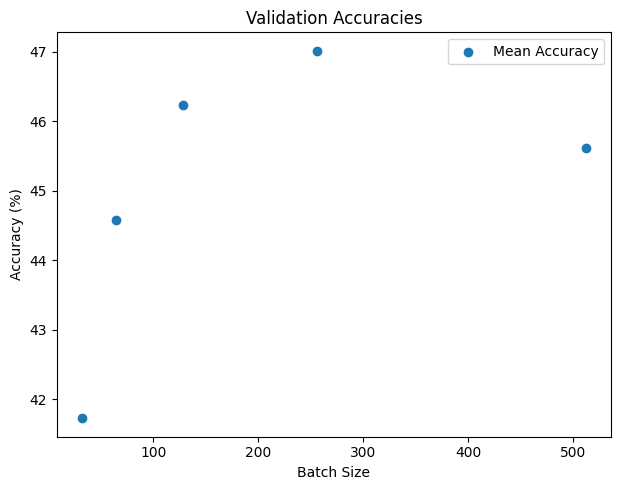

In [ ]:
import matplotlib.pyplot as plt

mean_cross_validation_accuracies = []
for batch_size, cross_validation_accuracy in cross_validation_accuracies.items():
    mean_cross_validation_accuracies.append(sum(cross_validation_accuracy) / len(cross_validation_accuracy) * 100)
    
# plot accuracies
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(batch_sizes, mean_cross_validation_accuracies, label=f'Mean Accuracy')
plt.title('Validation Accuracies')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from time import perf_counter

def train(model, train_dataloader, test_dataloader):
    num_epochs = 10000
    early_stopper = EarlyStopper(patience=5, min_delta=0.05)
    # train_dataloader, test_dataloader = intialise_loaders(X_train_scaled[neurons_tuple], y_train2, X_val_scaled, y_val2, batch_size)
    # train_dataloader, test_dataloader = intialise_loaders(X_train_scaled_dict[batch_size][i], y_train_dict[batch_size][i], X_val_scaled_dict[batch_size][i], y_val_dict[batch_size][i], batch_size)


    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    train_accuracies = []
    train_losses = []
    test_accuracies = []
    test_losses = []
    times = []


    # train model
    for epoch in range(num_epochs):
        start = perf_counter() 
        model.train()    
        training_loss = 0
        training_correct_preds = 0

        for inputs, labels in train_dataloader:
            # forward pass
            outputs = model(inputs.to(device))
            loss = loss_fn(outputs, labels.to(device))

            # backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # track loss and accuracy
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            training_correct_preds += (predicted.to(torch.device("cpu")) == labels.to(torch.device("cpu"))).sum().item()

        train_losses.append(training_loss / len(train_dataloader))
        train_accuracies.append(training_correct_preds / len(train_dataloader.dataset))

        # validation
        model.eval()
        with torch.no_grad():
            validation_loss = 0
            validation_correct_preds = 0
            for inputs, labels in test_dataloader:
                outputs = model(inputs.to(device))
                loss = loss_fn(outputs, labels.to(device))
                validation_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                validation_correct_preds += (predicted.to(torch.device("cpu")) == labels.to(torch.device("cpu"))).sum().item()

        # validation_losses.append(validation_loss / len(test_dataloader))
        # validation_accuracy.append(validation_correct_preds / len(test_dataloader.dataset))

        test_losses.append(validation_loss / len(test_dataloader))
        test_accuracies.append(validation_correct_preds / len(test_dataloader.dataset))
        end = perf_counter() 
        
        times.append(end - start)

        # early stopping
        if early_stopper.early_stop(validation_loss):
            print(f"Stopped early at epoch {epoch}.")
            print(f"Training Loss: {train_losses[-1]}, Validation Loss: {test_losses[-1]}, Training Accuracy: {train_accuracies[-1]}, Validation Accuracy: {test_accuracies[-1]}")
            break

    return train_accuracies, train_losses, test_accuracies, test_losses, times


In [ ]:
answer = "test the model accuracy after training on different 1-layer combinations, then choose the most optimal width. Then, test if adding another layer improves the accuracy, and so on. If adding a layer does not improve accuracy, we can stop searching because the higher model complexity is detrimental to performance."

def find_optimal_hyperparameter2(X_train, y_train, parameters, mode, batch_size):
    
    no_hidden_final = []
    best_acc = 0
    
    # maximum 3 layers
    for layer in range(3):
        cross_validation_accuracies = {}
        cross_validation_times = {}
        
        # possible widths in each layer
        for new_layer in [64, 128, 256, 512]:
            neurons = no_hidden_final.copy()
            neurons.append(new_layer)
            neurons_tuple = tuple(neurons)
            
            X_train_scaled_dict, X_val_scaled_dict, y_train_dict, y_val_dict = generate_cv_folds_for_parameters([neurons_tuple], X_train, y_train)
            
            # 5 fold cross validation
            print(f"Neurons: {neurons}")
            last_epoch_accuracies = []
            last_epoch_times = []
            for i in range(5):
                print(f"Fold: {i+1}")
                train_dataloader, test_dataloader = intialise_loaders(X_train_scaled_dict[neurons_tuple][i], y_train_dict[neurons_tuple][i], X_val_scaled_dict[neurons_tuple][i], y_val_dict[neurons_tuple][i], batch_size)

                # X_train_scaled = X_train_scaled_dict[neurons_tuple][i]
                # y_train2 = y_train_dict[neurons_tuple][i]
                # X_val_scaled = X_val_scaled_dict[neurons_tuple][i]
                # y_val2 = y_val_dict[neurons_tuple][i]

                # initialise model with neuron combination to be tested
                no_hidden = list(neurons_tuple)
                model = MLP(no_features, no_hidden, no_labels).to(device)

                # train model
                train_accuracies, train_losses, test_accuracies, test_losses, times = train(model, train_dataloader, test_dataloader)

                last_epoch_accuracies.append(test_accuracies[-1])
                last_epoch_times.append(times[-1])

            cross_validation_accuracies[neurons_tuple] = last_epoch_accuracies
            print(last_epoch_accuracies)
            cross_validation_times[neurons_tuple] = last_epoch_times
        
        
        # check if accuracy is improving. if not, break the loop
        for neurons, accuracies in cross_validation_accuracies.items():
            if (sum(accuracies) / len(accuracies)) > best_acc:
                no_hidden_final = list(neurons)
                best_acc = sum(accuracies) / len(accuracies)
        if len(no_hidden_final) == layer:
            break
    return no_hidden_final

# df = pd.read_csv('simplified.csv')

label_encoder = preprocessing.LabelEncoder()

y_train = processed_df['emotion']
y_train = label_encoder.fit_transform(y_train)
X_train = processed_df.drop(['filename', 'emotion'],axis=1)

optimal_bs = 512


# import itertools

# Define the list of values
# neuron_values = [512, 1024, 2048]

# Generate all combinations up to 3 items each in any order
# num_neurons_lists = []
# for r in range(3, 6):
#     combinations = itertools.product(neuron_values, repeat=r)
#     num_neurons_lists.extend([list(combination) for combination in combinations])

# print(num_neurons_lists)


# num_neurons_lists = [[64], [128], [256], [64, 64], [128, 128], [256, 256], [64, 128], [128, 64], [128, 256], [64, 256], [256, 128], [256, 64], [64, 64, 64], [128, 128, 128], [256, 256, 256], [64, 128, 256], [64, 256, 256], [128, 64, 64], [128, 128, 64], [256, 128, 64], [256, 256, 128]]
# num_neurons = [tuple(lst) for lst in num_neurons_lists]
no_hidden_final = find_optimal_hyperparameter2(X_train.to_numpy(), y_train, 'num_neurons', 'num_neurons', optimal_bs)
print()
print(f"optimal combination: {no_hidden_final}")

Neurons: [64]
Fold: 1
Stopped early at epoch 105.
Training Loss: 1.5736790671944618, Validation Loss: 2.008952260017395, Training Accuracy: 0.8895529821939983, Validation Accuracy: 0.44223107569721115
Fold: 2
Stopped early at epoch 56.
Training Loss: 1.6254814565181732, Validation Loss: 2.0061182975769043, Training Accuracy: 0.8394969493213796, Validation Accuracy: 0.4447211155378486
Fold: 3
Stopped early at epoch 82.
Training Loss: 1.5893834754824638, Validation Loss: 1.9984323978424072, Training Accuracy: 0.8747354003237455, Validation Accuracy: 0.45567729083665337
Fold: 4
Stopped early at epoch 62.
Training Loss: 1.6241536438465118, Validation Loss: 2.002338230609894, Training Accuracy: 0.8399950193002117, Validation Accuracy: 0.4506972111553785
Fold: 5
Stopped early at epoch 39.
Training Loss: 1.6235135719180107, Validation Loss: 2.0189382433891296, Training Accuracy: 0.8448705179282868, Validation Accuracy: 0.43447932237169906
[0.44223107569721115, 0.4447211155378486, 0.4556772908